In [1]:
import pandas as pd 
import xarray as xr
import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import pysumma as ps
import pysumma.plotting as psp

In [3]:
df = pd.read_csv('../src/snotel_csvs/paradise_WY25.csv', index_col=0, parse_dates=True, date_format='%Y-%m-%d %H:%M:%S')
df.index = pd.to_datetime(df.index)
df.index = df.index.tz_localize(None)

summa_df = xr.open_dataset('../src/output/_paradise_WY25_timestep.nc')

In [5]:
depth = summa_df.isel(hru=0)['iLayerHeight']
temp = summa_df.isel(hru=0)['mLayerTemp']
density = summa_df.isel(hru=0)['mLayerVolFracWat']

In [6]:
snow_depth_obs = df.loc[pd.to_datetime(depth.time.values.min()):]['SNOWDEPTH'].resample('D').max()  * 2.54/100
# replace below zero values with 0
snow_depth_obs[snow_depth_obs < 0] = 0
# replace nan values with nan
snow_depth_obs[abs(snow_depth_obs.diff()) > 0.25] = np.nan
# interpolate missing values
snow_depth_obs = snow_depth_obs.interpolate()

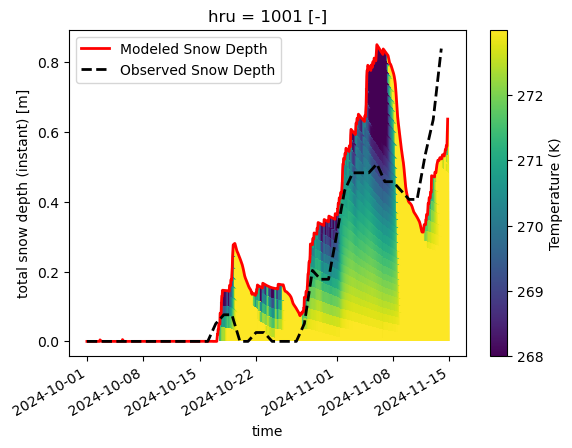

In [7]:
yfig, ax = plt.subplots()
psp.layers(temp, depth, colormap='viridis', plot_soil=False, plot_snow=True, cbar_kwargs={'label': 'Temperature (K)', 'ticks':np.arange(268,273,1)}, variable_range=[268, 273], ax=ax)
summa_df['scalarSnowDepth'].plot(color='red', linewidth=2, ax=ax, label='Modeled Snow Depth');
snow_depth_obs.plot(color='k', ls='--', linewidth=2, ax=ax, label='Observed Snow Depth');
ax.legend()